In [1]:
!pip install darts
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from darts.utils import timeseries_generation as tg
from sklearn.preprocessing import MinMaxScaler
from darts.models import BlockRNNModel

In [3]:
df = pd.read_csv("master_data.csv").set_index("date").drop(columns = "Unnamed: 0")

<Axes: xlabel='date'>

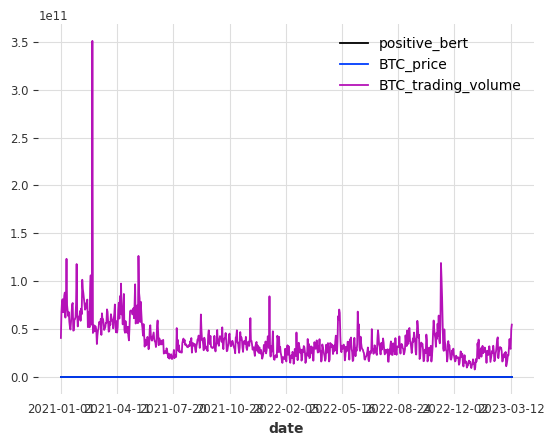

In [4]:
df[["positive_bert", "BTC_price", "BTC_trading_volume"]].plot()

In [5]:
#scaling and time series
PriceMinMax = MinMaxScaler()
price_df_scaled = PriceMinMax.fit_transform(df[["BTC_price"]])
price_ts_scaled = tg.TimeSeries.from_values(price_df_scaled.astype("float32"))

#scaling and time series
VolMinMax = MinMaxScaler()
trading_volume_scaled_df = VolMinMax.fit_transform(df[["BTC_trading_volume"]])
trading_volume_scaled_ts = tg.TimeSeries.from_values(trading_volume_scaled_df.astype("float32"))

#scaling and time series
PosMinMax = MinMaxScaler()
pos_scaled_df = PosMinMax.fit_transform(df[["positive_bert"]])
pos_scaled_ts = tg.TimeSeries.from_values(pos_scaled_df.astype("float32"))

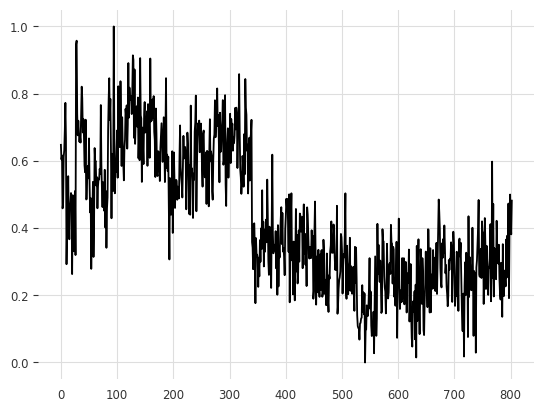

In [6]:
plt.plot(pos_scaled_df)

In [15]:
end = 700
input_length = 40
train, val = price_ts_scaled.split_before(end)
cov1_train, cov1_val = pos_scaled_ts.split_before(end)
cov2_train, cov2_val = trading_volume_scaled_ts.split_before(end)

brnn_volume_and_sentiment = BlockRNNModel(input_chunk_length=input_length, 
                             output_chunk_length=2, 
                             n_rnn_layers=8)

brnn_volume_and_sentiment.fit(train, 
                          past_covariates=cov1_train.stack(cov2_train), 
                          epochs=30, 
                          verbose=True)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 9.8 K 
4 | fc            | Sequential       | 52    
---------------------------------------------------
9.9 K     Trainable params
0         Non-trainable params
9.9 K     Total params
0.040     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [16]:
cov1_useless, cov1_pred = pos_scaled_ts.split_before(end-input_length)
cov2_useless, cov2_pred = trading_volume_scaled_ts.split_before(end-input_length)



In [17]:
prediction = brnn_volume_and_sentiment.predict(2, past_covariates=cov1_pred.stack(cov2_pred))

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

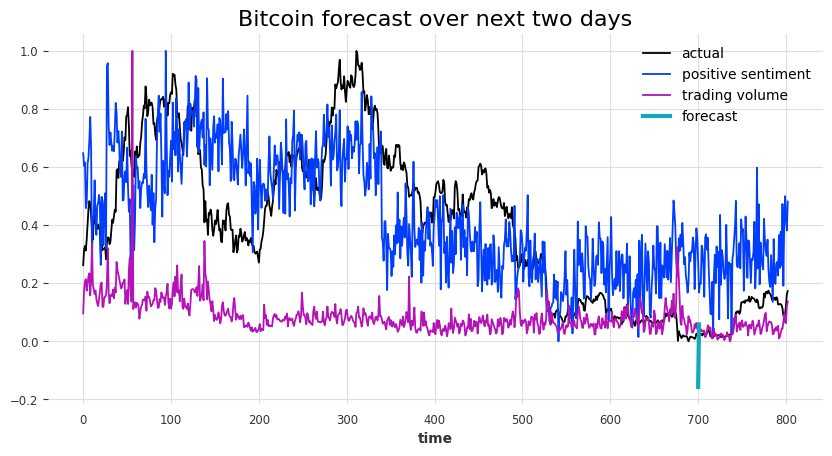

In [18]:
plt.figure().set_figwidth(10)
plt.plot(price_ts_scaled.pd_dataframe(), label='actual')
plt.plot(pos_scaled_ts.pd_dataframe(), label = 'positive sentiment')
plt.plot(trading_volume_scaled_ts.pd_dataframe(), label = 'trading volume')
prediction.plot(label='forecast', lw=3)
plt.title('Bitcoin forecast over next two days', fontsize=16)
plt.legend()

In [ ]:
historical_forecast = brnn_volume_and_sentiment.historical_forecasts(
    price_ts_scaled, 
    forecast_horizon = 2,
    past_covariates=pos_scaled_ts.stack(trading_volume_scaled_ts), 
    retrain=False,
    verbose=False
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: 

IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (m

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: 

IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (m

In [ ]:
plt.figure(figsize = (20,5))
price_ts_scaled.plot(label='actual')
historical_forecast.plot(label='backtest')
plt.legend()